In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
#plt.style.use('dark_background')

In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"


In [3]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"])
   # arr_z = np.array(data[f"amp{modo}"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], amp.T, phase.T
    

In [4]:
def plot_satelites (ax_label):
    transparencia = 0.9
    tamaño = 2
    ax[ax_label].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
#Grillo
    ax[ax_label].axvline(x = 7.0,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
    ax[ax_label].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)

#Mosquito
    ax[ax_label].axvline(x = 7.30,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    ax[ax_label].axvline(x = 5.63,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    ax[ax_label].axvline(x = 3.99, ls='--',c = "magenta", linewidth =tamaño, alpha = 0.5)
    ax[ax_label].axvline(x = 2.09,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    ax[ax_label].axvline(x = 0.1,ls='--', c = "magenta", linewidth =tamaño, alpha = 0.5)
    #plt.colorbar()

In [5]:
snapshots_analysis = [520,523,525, 527,530,532,535, 537,539,541,
 543, 545,547, 550, 553, 555,557, 560, 563, 565, 567,570,573, 575, 577, 580,
 583, 585,587,590, 592,594,596,598,600,
 602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
 629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
 664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
 690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
 718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
 755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
 782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
 818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
 853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
 890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
 930, 932, 934, 937,
 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996]

snapshots_analizar = [600, 604, 610]

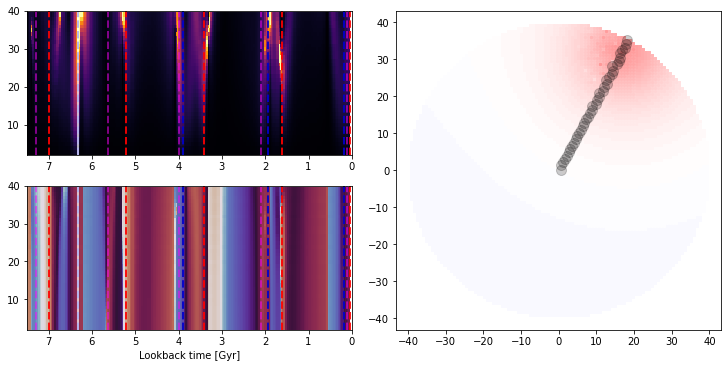

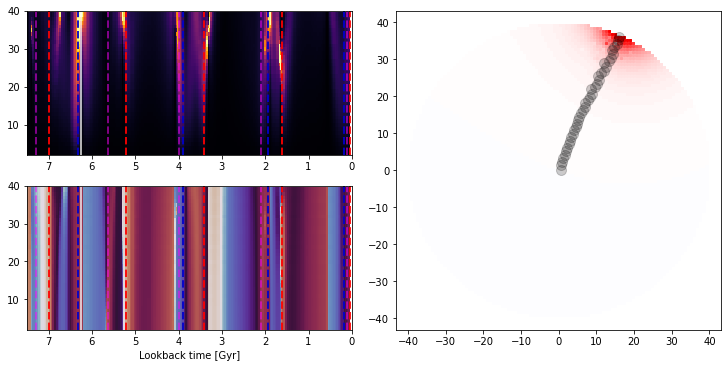

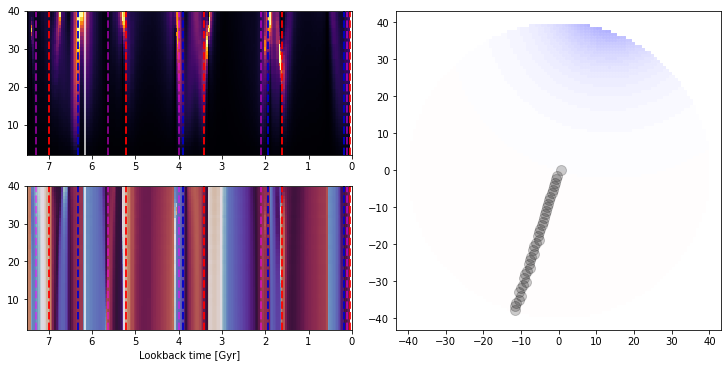

In [41]:
for name in snapshots_analizar:
    nbins = 40
    fourier_dm = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog.csv", sep = ",")
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_{name}_all_satellites_id_ytRS.csv", sep = ",")
    lookback, rcenters, amplitude, phase = process_data_to_plot(fourier_dm,modo=1, nbins=nbins)
   # print(phase)
    rango=100
    size = 5
    ancho = 45
    seconds_to_Myr = 3.15576e+16
    vmin = 0
    vmax = 5
    fig, ax = plt.subplot_mosaic([['upper_left', 'right'],
                                   ['lower_left', 'right']],
                                  figsize=(10,5), constrained_layout=True)
    im0 = ax["upper_left"].pcolormesh(lookback,rcenters,amplitude*3.15576e+16,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax["lower_left"].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax["upper_left"].set_xlim(7.5,0)
    ax["upper_left"].set_ylim(2,40)
    plot_satelites("upper_left")
    plot_satelites("lower_left")
    ax["lower_left"].set_xlim(7.5,0)
    ax["lower_left"].set_ylim(2,40)

    lookback_array = np.array(lookback)
    ind = np.where(np.array(snapshots_analysis) ==name)
    phase_i = np.zeros(nbins)
    lb = np.array(lookback_array[ind])
    for i,ph in enumerate(phase):
        phase_i[i] = ph[ind]
    x = rcenters*np.cos(phase_i)
    y = rcenters*np.sin(phase_i)

    ax["upper_left"].axvline(x = lb, ls='-', c = "white", linewidth = 2, alpha = 0.7)
    ax["lower_left"].axvline(x = lb, ls='-', c = "white", linewidth = 2, alpha = 0.7)
    az = ax["right"].scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az_core*seconds_to_Myr, 
                    cmap= "seismic", s = size, vmin =-rango, vmax = rango)
    ax["right"].scatter(x, y,marker = "o", color = "black", alpha = 0.2, s = 100)
    #fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
    #ax["right"].set_title (f"{lb[0]:.2f} Gyr", fontsize = 16)

    ax["lower_left"].set_xlabel("Lookback time [Gyr]")
   # plt.savefig(f"DM_acceleration/{name}.png", bbox_inches='tight', dpi = 100)

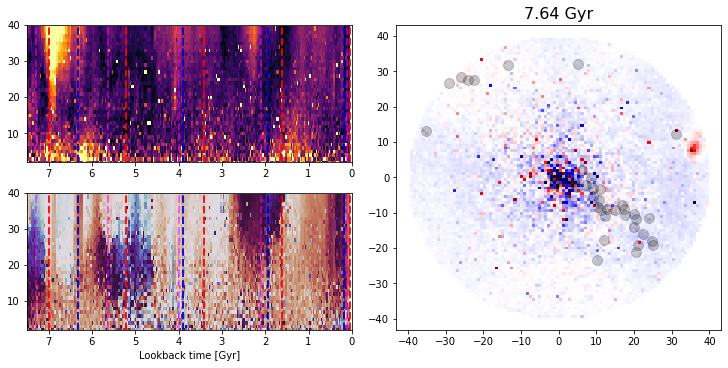

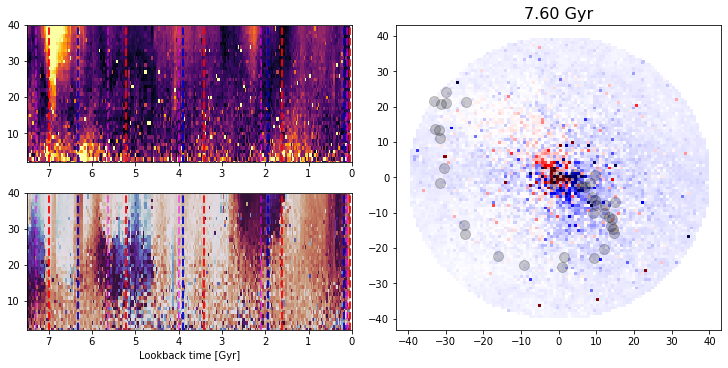

In [14]:
snapshots_analysis = [704, 802]
for name in snapshots_analysis:
    nbins = 40
 #   fourier_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_dm.csv", sep = ",")
    fourier_dm = pd.read_csv("prueba_dm_fourier.csv", sep = ",")
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40.csv", sep = ",")
    lookback, rcenters, amplitude, phase = process_data_to_plot(fourier_dm,modo=1, nbins=nbins)

    rango=300
    size = 5
    ancho = 45
    seconds_to_Myr = 3.15576e+16
    vmin = 0
    vmax = 8000
    fig, ax = plt.subplot_mosaic([['upper_left', 'right'],
                                   ['lower_left', 'right']],
                                  figsize=(10,5), constrained_layout=True)
    im0 = ax["upper_left"].pcolormesh(lookback,rcenters,amplitude*3.15576e+16,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax["lower_left"].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "twilight")
    ax["upper_left"].set_xlim(7.5,0)
    ax["upper_left"].set_ylim(2,40)
    plot_satelites("upper_left")
    plot_satelites("lower_left")
    ax["lower_left"].set_xlim(7.5,0)
    ax["lower_left"].set_ylim(2,40)

    lookback_array = np.array(lookback)
    ind = np.where(np.array(snapshots_analysis) ==name)
    phase_i = np.zeros(nbins)
    lb = np.array(lookback_array[ind])
    for i,ph in enumerate(phase):
        phase_i[i] = ph[ind]
    x = rcenters*np.cos(phase_i)
    y = rcenters*np.sin(phase_i)

    ax["upper_left"].axvline(x = lb, ls='-', c = "white", linewidth = 2, alpha = 0.7)
    ax["lower_left"].axvline(x = lb, ls='-', c = "white", linewidth = 2, alpha = 0.7)
    az = ax["right"].scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az*seconds_to_Myr, 
                    cmap= "seismic", s = size, vmin =-rango, vmax = rango)
    ax["right"].scatter(x, y,marker = "o", color = "black", alpha = 0.2, s = 100)
    #fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
    ax["right"].set_title (f"{lb[0]:.2f} Gyr", fontsize = 16)

    ax["lower_left"].set_xlabel("Lookback time [Gyr]")
   # plt.savefig(f"DM_acceleration/{name}.png", bbox_inches='tight', dpi = 100)

In [12]:
fourier_dm

,snapshot_t,lookbacktime,Rcenters,nparticles,amp1,amp2,phase1,phase2
0,520.0,7.641375,0.5,4.0,3.397566e-14,1.024304e-13,-0.766463,1.570796
1,520.0,7.641375,1.5,12.0,5.463223e-14,2.146687e-14,2.836341,-0.388630
2,520.0,7.641375,2.5,28.0,6.556223e-14,7.551233e-14,-2.105330,-3.040208
3,520.0,7.641375,3.5,36.0,1.358861e-13,7.839567e-14,-0.447453,-1.939251
4,520.0,7.641375,4.5,40.0,8.019751e-14,1.216540e-14,-0.135559,-1.027708
...,...,...,...,...,...,...,...,...
8955,996.0,0.057232,35.5,348.0,4.561575e-14,1.170884e-14,1.638531,1.255991
8956,996.0,0.057232,36.5,352.0,3.551115e-14,2.447076e-14,1.776979,1.461852
8957,996.0,0.057232,37.5,372.0,3.961949e-14,2.259273e-14,1.638461,1.500796
8958,996.0,0.057232,38.5,372.0,5.180501e-14,1.936340e-14,1.633740,1.445666


In [18]:
fourier_dm
arr_z = np.log10((np.array(fourier_dm["amp1"]/fourier_dm["Nparticles"]))*seconds_to_Myr)
# arr_z = np.array(data[f"amp{modo}"])
amp = arr_z.reshape(-1, nbins)
arr_z = np.array(fourier_dm[f"phase1"])
phase = arr_z.reshape(-1, nbins)
#data["lookbacktime"][::nbins]
rcenters= fourier_dm["Rcenters"][0:nbins]


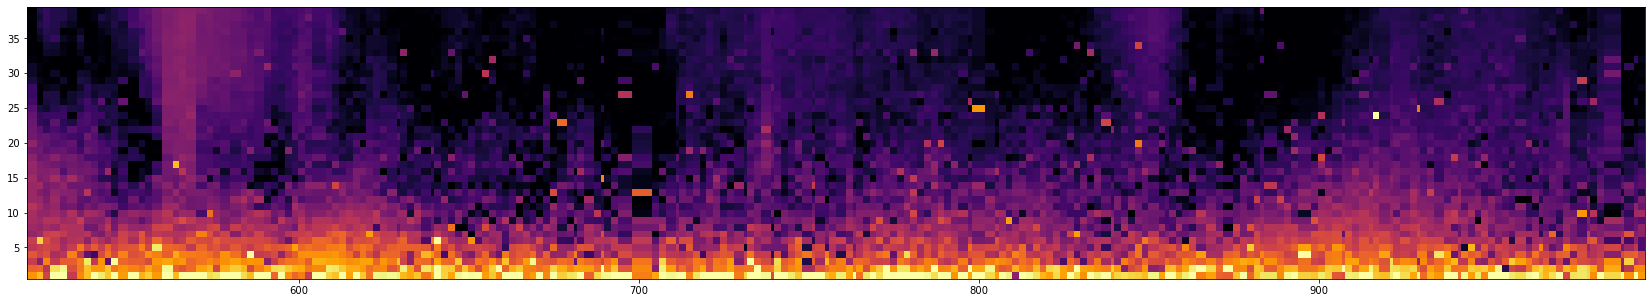

In [21]:
fig, ax = plt.subplots(nrows=1,ncols =1,sharex = True,sharey = True,  figsize=(29,5))
im0 = ax.pcolormesh(snapshots_analysis,rcenters,amp.T, vmin = 0.6, vmax =3, cmap = "inferno")

In [20]:
snapshots_analysis = [520,523,525, 527,530,532,535, 537,539,541,
 543, 545,547, 550, 553, 555,557, 560, 563, 565, 567,570,573, 575, 577, 580,
 583, 585,587,590, 592,594,596,598,600,
 602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
 629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
 664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
 690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
 718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
 755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
 782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
 818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
 853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
 890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
 930, 932, 934, 937,
 939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996]


In [9]:
snapshots_analysis_a = [594,596,598,600, 602, 604, 608, 610, 612, 614, 616, 618]
snapshots_analysis_b = [731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752]
seconds_to_Myr = 3.15576e+16
rango=270
size = 5
ancho = 45
datos_edades =  pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

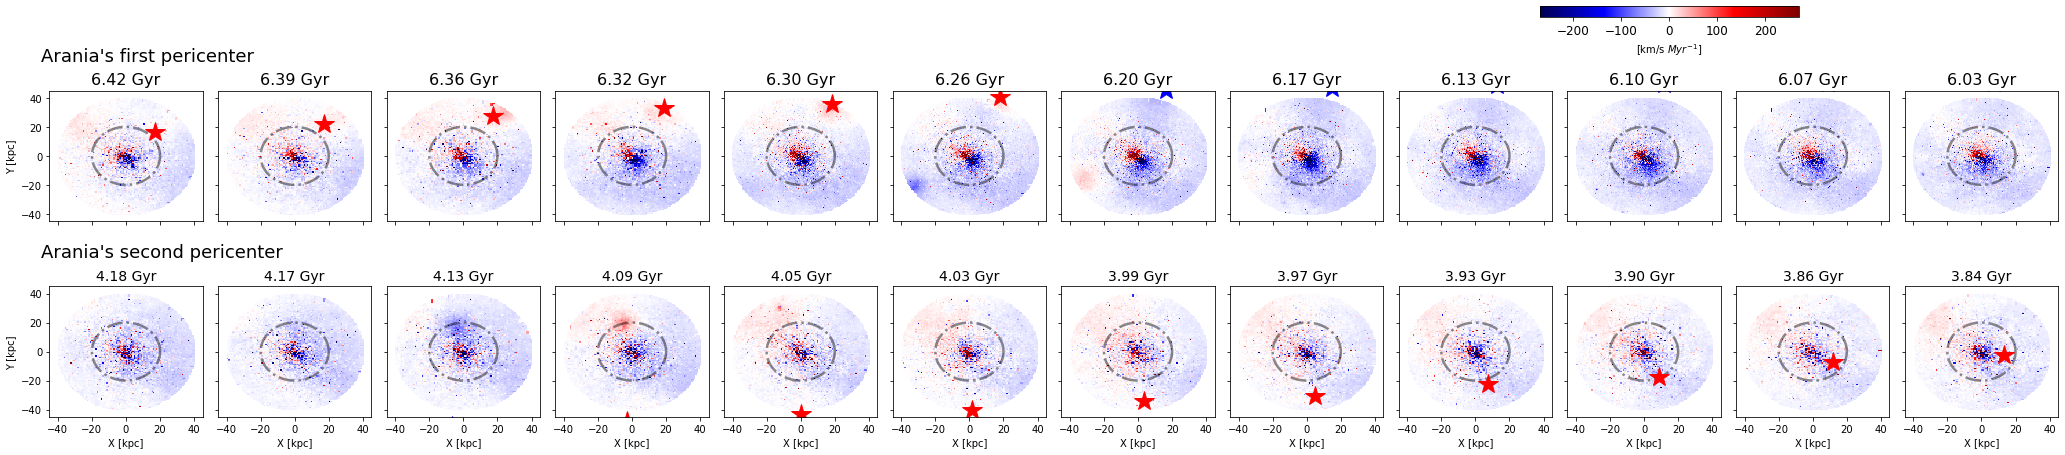

In [34]:
fig, ax = plt.subplots(2, len(snapshots_analysis), sharex=True, sharey=True,figsize = (3*len(snapshots_analysis),6))
fig.subplots_adjust(hspace=0.5, wspace=0.1)
theta = np.linspace(0, 2*np.pi, 100)
r1 = 20
x = r1*np.cos(theta)
y = r1*np.sin(theta)
sat = pd.read_csv(path_datos + "satelite_arania_coordinates.csv" ,sep = ",")
for i, name in enumerate(snapshots_analysis_a):
    lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40.csv", sep = ",")
    x_sat = sat.loc[sat['Snapshot'] == name, 'X'].iloc[0]
    y_sat = sat.loc[sat['Snapshot'] == name, 'Y'].iloc[0]
    z_sat = sat.loc[sat['Snapshot'] == name, 'Z'].iloc[0]
    if z_sat > 0:
        color_mark = "red"
    else:
        color_mark = "blue"
    ax[0,i].set_title (f"{lb:.2f} Gyr", fontsize = 16)
    ax[0, i].plot(x, y, "-.", color = "black", alpha = 0.45, lw = 2.5)
    az = ax[0,i].scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az*seconds_to_Myr, 
                    cmap= "seismic", s = size, vmin =-rango, vmax = rango)
    
    ax[0, i].plot(x_sat , y_sat, marker= "*", color = color_mark, ms = 20)
    ax[0, i].set_xlim(-ancho,ancho)
    ax[0, i].set_ylim(-ancho,ancho)
for i, name in enumerate(snapshots_analysis_b):
    lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40.csv", sep = ",")
    x_sat = sat.loc[sat['Snapshot'] == name, 'X'].iloc[0]
    y_sat = sat.loc[sat['Snapshot'] == name, 'Y'].iloc[0]   
    z_sat = sat.loc[sat['Snapshot'] == name, 'Z'].iloc[0]
    if z_sat > 0:
        color_mark = "red"
    else:
        color_mark = "blue"
    ax[1,i].set_title (f"{lb:.2f} Gyr", fontsize = 14)
    ax[1, i].plot(x, y, "-.", color = "black", alpha = 0.45, lw = 2.5)
    az = ax[1,i].scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az*seconds_to_Myr, 
                    cmap= "seismic", s = size, vmin =-rango, vmax = rango)
    ax[1, i].plot(x_sat , y_sat, marker= "*", color = color_mark, ms = 20)
    ax[1, i].set_xlim(-ancho,ancho)
    ax[1, i].set_ylim(-ancho,ancho)
    ax[1,i].set_xlabel("X [kpc]", fontsize = 10)
    
ax[0,0].set_ylabel("Y [kpc]", fontsize = 10)
ax[1,0].set_ylabel("Y [kpc]", fontsize = 10)
cbar_ax = fig.add_axes([0.7, 1.05, 0.1, 0.025])
cbar = fig.colorbar(az, cax=cbar_ax , orientation = "horizontal", label=  "[km/s $Myr^{-1}$]",)  
cbar.ax.tick_params(labelsize=12) 
ax[0,0].text(-50, 65, "Arania's first pericenter", fontsize=18)
ax[1,0].text(-50, 65, "Arania's second pericenter", fontsize=18)
plt.savefig("results/DM_acceleration_comparison.png", bbox_inches='tight', dpi = 100, facecolor = "white")

In [64]:
ind = np.where(np.array(snapshots_analysis) ==996)

In [37]:
ind

(array([223]),)

In [48]:
ind = np.where(np.array(snapshots_analysis) ==996)
phase_i = np.zeros(40)
for i,ph in enumerate(phase):
    phase_i[i] = ph[ind]
  #  phase_i.append(np.array(ph[ind]))

In [63]:
lb = lookback[np.where(np.array(snapshots_analysis) ==996)]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [67]:
np.array(lookback)

array([7.64137539, 7.59671317, 7.56668362, 7.53339064, 7.48297956,
       7.44562269, 7.38898298, 7.36802849, 7.32581408, 7.30455431,
       7.27149628, 7.2362272 , 7.19831221, 7.15268139, 7.09926046,
       7.07555773, 7.03976448, 6.98675123, 6.94390972, 6.8993    ,
       6.86629217, 6.81636491, 6.77939936, 6.742137  , 6.71307736,
       6.66005883, 6.61386282, 6.57322992, 6.53937659, 6.48929541,
       6.46277993, 6.42080368, 6.39123575, 6.36003792, 6.32318177,
       6.29681954, 6.25702137, 6.19806718, 6.16682667, 6.1338912 ,
       6.10071928, 6.0673461 , 6.03207287, 5.99483203, 5.957324  ,
       5.93656399, 5.8948117 , 5.85272747, 5.82942316, 5.80601982,
       5.75884758, 5.73511368, 5.68735127, 5.674282  , 5.6348775 ,
       5.60709689, 5.56319727, 5.53222848, 5.49958001, 5.46677174,
       5.43204581, 5.39547399, 5.37707388, 5.3382207 , 5.2972537 ,
       5.27664111, 5.2351585 , 5.21432316, 5.17026634, 5.14704656,
       5.10032232, 5.07678395, 5.02469392, 4.99844227, 4.97209

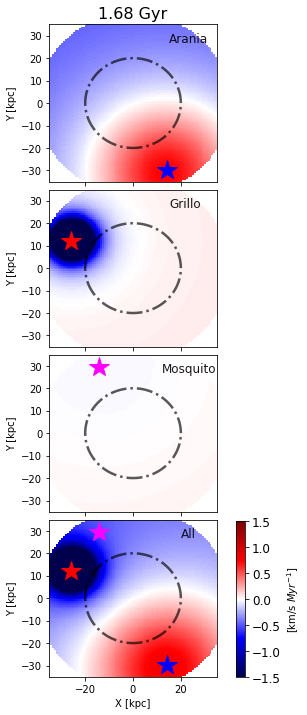

In [61]:
rango=1.5
size = 5
ancho = 35

fig, ax = plt.subplots(4,1, sharex=True, sharey=True, figsize = (3,12))
fig.subplots_adjust(hspace=0.05, wspace=0.1)
theta = np.linspace(0, 2*np.pi, 100)
r1 = 20
x = r1*np.cos(theta)
y = r1*np.sin(theta)
sat_arania = pd.read_csv(path_datos + "satelite_arania_coordinates.csv" ,sep = ",")
sat_grillo = pd.read_csv(path_datos + "satelite_grillo_coordinates.csv" ,sep = ",")
sat_mosquito = pd.read_csv(path_datos + "satelite_mosquito_coordinates.csv" ,sep = ",")
#for i, name in enumerate(snapshots_analysis_a):
lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
mesh_arania = pd.read_csv(path_acceleration + f"mesh_aceleracion_{name}_arania_satellites_id_ytRS.csv", sep = ",")
mesh_grillo= pd.read_csv(path_acceleration + f"mesh_aceleracion_{name}_grillo_satellites_id_ytRS.csv", sep = ",")
mesh_mosquito = pd.read_csv(path_acceleration + f"mesh_aceleracion_{name}_mosquito_satellites_id_ytRS.csv", sep = ",")

mesh_all = pd.read_csv(path_acceleration + f"mesh_aceleracion_{name}_all_satellites_id_ytRS.csv", sep = ",")

x_arania = sat_arania.loc[sat_arania['Snapshot'] == name, 'X'].iloc[0]
y_arania = sat_arania.loc[sat_arania['Snapshot'] == name, 'Y'].iloc[0]

x_grillo = sat_grillo.loc[sat_grillo['Snapshot'] == name, 'X'].iloc[0]
y_grillo = sat_grillo.loc[sat_grillo['Snapshot'] == name, 'Y'].iloc[0]

x_mosquito = sat_mosquito.loc[sat_mosquito['Snapshot'] == name, 'X'].iloc[0]
y_mosquito = sat_mosquito.loc[sat_mosquito['Snapshot'] == name, 'Y'].iloc[0]

ax[0].set_title (f"{lb:.2f} Gyr", fontsize = 16)


az = ax[0].scatter(mesh_arania.X,mesh_arania.Y, marker='s', c=mesh_arania.az_core*seconds_to_Myr, 
                cmap= "seismic", s = size, vmin =-rango, vmax = rango)
az = ax[1].scatter(mesh_grillo.X,mesh_grillo.Y, marker='s', c=mesh_grillo.az_core*seconds_to_Myr, 
                cmap= "seismic", s = size, vmin =-rango, vmax = rango)
az = ax[2].scatter(mesh_mosquito.X,mesh_mosquito.Y, marker='s', c=mesh_mosquito.az_core*seconds_to_Myr, 
                cmap= "seismic", s = size, vmin =-rango, vmax = rango)
az = ax[3].scatter(mesh_all.X,mesh_all.Y, marker='s', c=mesh_all.az_core*seconds_to_Myr, 
                cmap= "seismic", s = size, vmin =-rango, vmax = rango)

ax[0].plot(x_arania , y_arania, marker= "*", color = "blue", ms = 20)
ax[3].plot(x_arania , y_arania, marker= "*", color = "blue", ms = 20)
ax[1].plot(x_grillo , y_grillo, marker= "*", color = "red", ms = 20)
ax[3].plot(x_grillo , y_grillo, marker= "*", color = "red", ms = 20)
ax[2].plot(x_mosquito , y_mosquito, marker= "*", color = "magenta", ms = 20)
ax[3].plot(x_mosquito , y_mosquito, marker= "*", color = "magenta", ms = 20)

for i in range(0,4):
    ax[i].set_xlim(-ancho,ancho)
    ax[i].set_ylim(-ancho,ancho)
    ax[i].plot(x, y, "-.", color = "black", alpha = 0.65, lw = 2.5)
ax[0].text(15, 27, "Arania", fontsize = 12, alpha = 0.9)
ax[1].text(15, 27, "Grillo", fontsize = 12, alpha = 0.9)
ax[2].text(12, 27, "Mosquito", fontsize = 12, alpha = 0.9)
ax[3].text(20, 27, "All", fontsize = 12, alpha = 0.9)
cbar_ax = fig.add_axes([0.99, 0.125, 0.04, 0.18])
cbar = fig.colorbar(az, cax=cbar_ax , orientation = "vertical", label=  "[km/s $Myr^{-1}$]")  
cbar.ax.tick_params(labelsize=12) 


ax[0].set_ylabel("Y [kpc]", fontsize = 10)
ax[1].set_ylabel("Y [kpc]", fontsize = 10)
ax[2].set_ylabel("Y [kpc]", fontsize = 10)
ax[3].set_ylabel("Y [kpc]", fontsize = 10)
ax[3].set_xlabel("X [kpc]", fontsize = 10)
plt.savefig("results/satelites_acceleration_example.png", bbox_inches='tight', dpi = 100, facecolor = "white")